## Overview of the data

The AdventureWorks databases are sample databases that were published by Microsoft to show how to design a SQL Server database. AdventureWorks database contain the data warehouse sample. The tables used in this exercise are belong to the Sales and Product categories (ER diagram Figure 1). The data is contained in  **AdventureWorks.db** SQLite database. For most information about the database visit the [repository](https://github.com/microsoft/sql-server-samples/tree/master/samples/databases/adventure-works) of author or original documentation [here](https://dataedo.com/download/AdventureWorks.pdf).

### AdventureWorks ER Diagram for  sales and product categories

<p align="center"><img src="Figures/Fig1.png"
     alt="Markdown Monster icon"  width="1000" />



### Detail the tables sales and product categories

**Product Tables:**
* **Product**: Product that the company sells
* **ProductReview**: Rating and review left by customers
* **ProductModelProductDescriptionCulture**: link file be products and her descriptions. Also, language and region of the product.
* **ProductDescription**: Description of each product, for a specific region
* **ProductCategory**: the broad categories that products fit into
* **ProductSubCategory**: the narrower subcategories that products fit into

**Sales Tables:**
* **SalesPerson**:  Salesperson information on their commission and performance
* **SalesOrderHeader**: Sale summarizing the sale
* **SalesOrderDetail**: Detailing each product that forms part of the sale
* **SalesTerritory**: Different territories where products are sold, including performance

**Region Tables:**
* **CountryRegionCurrency**: the currency used by each region
* **CurrencyRate**: the average and closing exchange rates for each currency compared to the USD



In [11]:
import pandas as pd #read the dataset in the python enviroment
import sqlalchemy #read sql to dataframe and apply queries
sqbase = sqlalchemy.create_engine("sqlite:///AdventureWorks.db") #load the dataset in sqlite format


In [236]:
#function for plot the result
#plot libraries
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt

def plot_answer(data_in,clm_cat, clm_value, pst = 'v',wd =8,hd=8,scale = 1):

    if pst == "v":
        axe_x = clm_cat
        axe_y = clm_value
    else:
        axe_x = clm_value
        axe_y = clm_cat

    tmp_dt = data_in
    tmp_dt[clm_cat] =data_in[clm_cat].astype(str)

    fig, ax=plt.subplots(1,1, figsize=(wd,hd))
    sns.set(font_scale = scale)
    plt.suptitle('PLOT COLUMNS OF INTEREST FROM THE QUERY RESPONSE',fontsize=20)
    sns.set_color_codes("muted")
    ax = sns.barplot( x = axe_x, y = axe_y, data = tmp_dt, label = clm_value.upper(), color = '#2258B6')#, ax=ax[0])
    ax.grid(b =True, which='major', color='black', linewidth = 0.1, axis='x')
    
    palette_colors = list()
    for row_cat, bar  in zip(tmp_dt[clm_value], ax.patches):
        if row_cat == tmp_dt[clm_value].max():
            bar.set_color('#2ECC71') #green paster
        elif row_cat == tmp_dt[clm_value].min():
            bar.set_color('#DE3163') #red pastel
        # else:
        #     bar.set_color('') #blue pastel


    return tmp_dt

### 1. Finding the most popular products

#### 1.1 Review the product table and product review table and rank the products according to their average review rating.

,productid,NAME,avgrating,num_ratings
0,709,"Mountain Bike Socks, M",5.0,1
1,937,HL Mountain Pedal,4.0,2
2,937,HL Mountain Pedal,2.0,3
3,798,"Road-550-W Yellow, 40",5.0,4


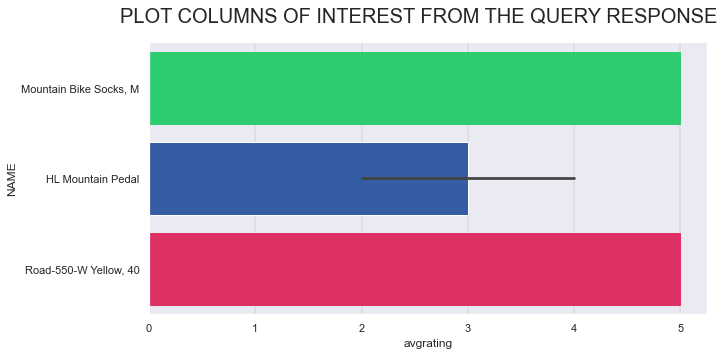

In [238]:
query = """
SELECT  product.productid AS productid, 
		product.NAME AS NAME, 
		CAST(productreview.rating AS FLOAT) AS avgrating, 
		productreview.productreviewid AS num_ratings
FROM (product INNER JOIN productreview ON product.productid = productreview.productid)
ORDER BY num_ratings ASC
"""

plot_answer(pd.read_sql(query, con=sqbase),'NAME','avgrating','h',10,5,2)


#### 1.2. Find the product model ID and description in english for each product, print the 4 first rows

In [223]:
query = """
SELECT productmodelproductdescriptionculture.productmodelid
	, productdescription.description
FROM productmodelproductdescriptionculture 
INNER JOIN productdescription ON productmodelproductdescriptionculture.productdescriptionid = productdescription.productdescriptionid -- search the description of producto by id of descriptions
WHERE cultureid LIKE 'en' --only take the description in english
LIMIT 5
"""
pd.read_sql(query, con=sqbase)

,productmodelid,description
0,1,"Light-weight, wind-resistant, packs to fit int..."
1,2,Traditional style with a flip-up brim; one-siz...
2,3,"Synthetic palm, flexible knuckles, breathable ..."
3,4,"Full padding, improved finger flex, durable pa..."
4,5,Each frame is hand-crafted in our Bothell faci...


#### 1.3. Shows how many items were ordered in total for every product in the database. Display the 5 first rows

,productid,quantity
0,707,6266
1,708,6532
2,709,1107
3,710,90
4,711,6743


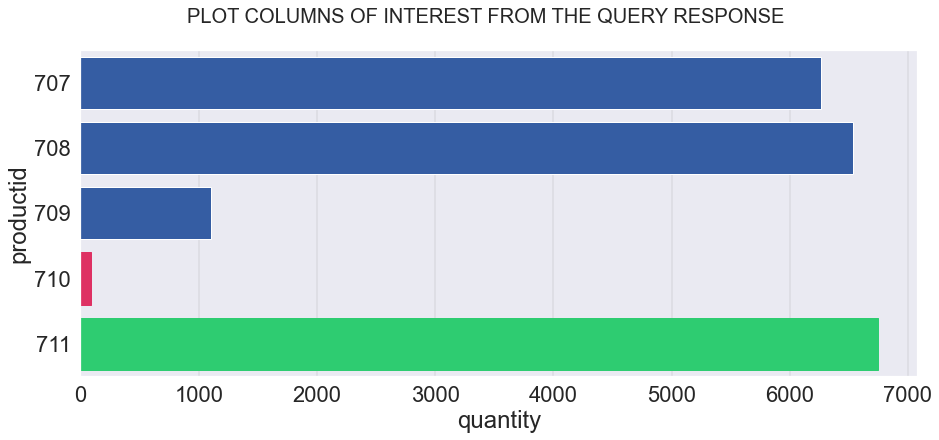

In [240]:
query = """
SELECT productid
	  ,sum(orderqty) AS quantity --sum of selling product 
FROM salesorderdetail --table of query 
GROUP BY productid -- group by id of product
ORDER BY productid ASC -- order by the sum of selling product with self id of product
LIMIT 5
"""
plot_answer(pd.read_sql(query, sqbase),'productid','quantity','h',15,6,2)

#### 1.4 Shows the list price for each product, alongside its category and subcategory. Display the 5 first rows

,productid,category,subcategory,listprice
0,680,Components,Road Frames,1431.50
1,706,Components,Road Frames,1431.50
2,707,Accessories,Helmets,34.99
3,708,Accessories,Helmets,34.99
4,709,Clothing,Socks,9.50


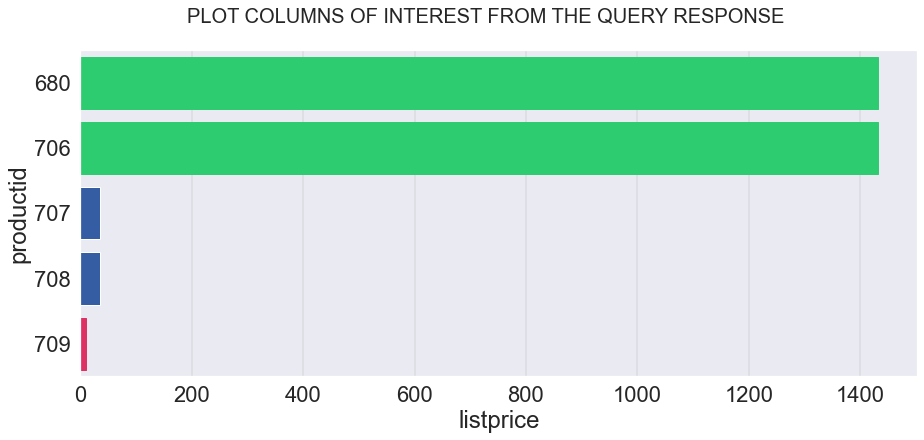

In [242]:
query = """
SELECT product.productid
    ,productcategory.name AS category
    ,productsubcategory.name AS subcategory
    ,product.listprice
FROM product 
INNER JOIN productsubcategory ON product.productsubcategoryid = productsubcategory.productsubcategoryid --search name subcategory product according to id subcategory
INNER JOIN productcategory ON productsubcategory.productcategoryid = productcategory.productcategoryid --search name category product according to id category
LIMIT 5
"""
plot_answer(pd.read_sql(query, sqbase),'productid','listprice','h',15,6,2)

#### 1.5 Merge the  two previous tables and show, for each subcategory, the average list price and the total quantity of products sold. Display the 5 first rows

,category,subcategory,average_price_in_subcategory,total_items_sold_in_subcategory
0,Accessories,Bike Racks,120.00,3166
1,Accessories,Bike Stands,159.00,249
2,Accessories,Bottles and Cages,7.99,10552
3,Accessories,Cleaners,7.95,3319
4,Accessories,Fenders,21.98,2121


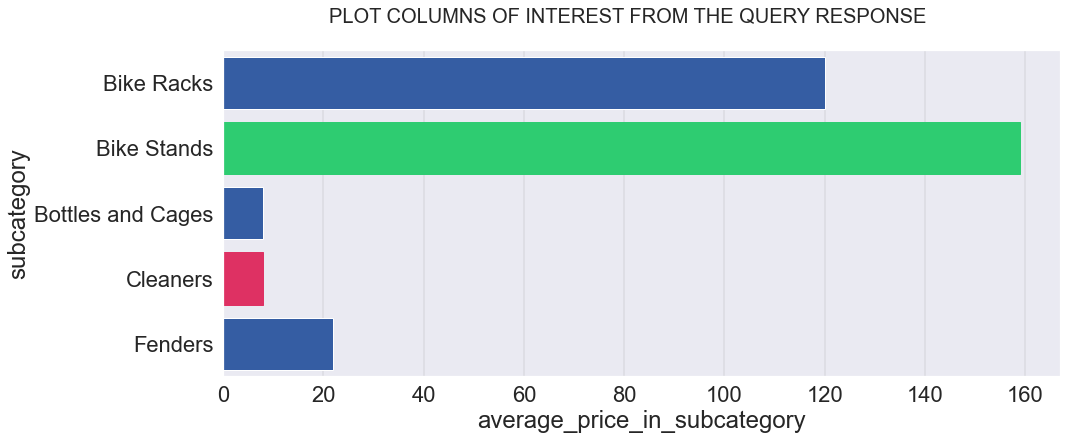

In [244]:
query = """
WITH first_query_alias AS
    (
    SELECT productid
		, sum(orderqty) AS quantity --sum of selling product 
	FROM salesorderdetail --table of query 
	GROUP BY productid -- group by id of product
	ORDER BY productid ASC -- order by the sum of selling product with self id of product
    ),
second_query_alias AS -- Notice we didn't include a second WITH here
    (
    SELECT product.productid
		,productsubcategory.name AS subcategory
		,productcategory.name AS category
		,product.listprice
	FROM product 
	INNER JOIN productsubcategory ON product.productsubcategoryid = productsubcategory.productsubcategoryid --search name subcategory product according to id subcategory
	INNER JOIN productcategory ON productsubcategory.productcategoryid = productcategory.productcategoryid --search name category product according to id category
    )
SELECT second_query_alias.category 
	,second_query_alias.subcategory 
	,AVG(second_query_alias.listprice) AS average_price_in_subcategory
	,SUM(first_query_alias.quantity) AS total_items_sold_in_subcategory
FROM first_query_alias
INNER JOIN second_query_alias ON first_query_alias.productid = second_query_alias.productid
GROUP BY second_query_alias.category, second_query_alias.subcategory 
ORDER BY second_query_alias.category, second_query_alias.subcategory
LIMIT 5
"""
plot_answer(pd.read_sql(query, sqbase),'subcategory','average_price_in_subcategory','h',15,6,1)


,category,subcategory,average_price_in_subcategory,total_items_sold_in_subcategory
0,Accessories,Bike Racks,120.00,3166
1,Accessories,Bike Stands,159.00,249
2,Accessories,Bottles and Cages,7.99,10552
3,Accessories,Cleaners,7.95,3319
4,Accessories,Fenders,21.98,2121


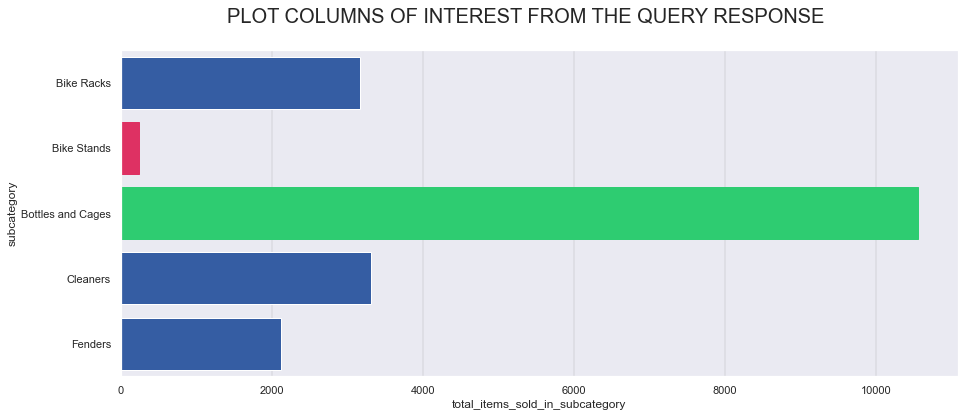

In [246]:
plot_answer(pd.read_sql(query, sqbase),'subcategory','total_items_sold_in_subcategory','h',15,6,1)

### 2. Sales people queries

#### 2.1. Find the top five performing salespeople using the busienss entity id and sales ytd

,businessentityid,salesytd
0,276,4.251369e+06
1,289,4.116871e+06
2,275,3.763178e+06
3,277,3.189418e+06
4,290,3.121616e+06


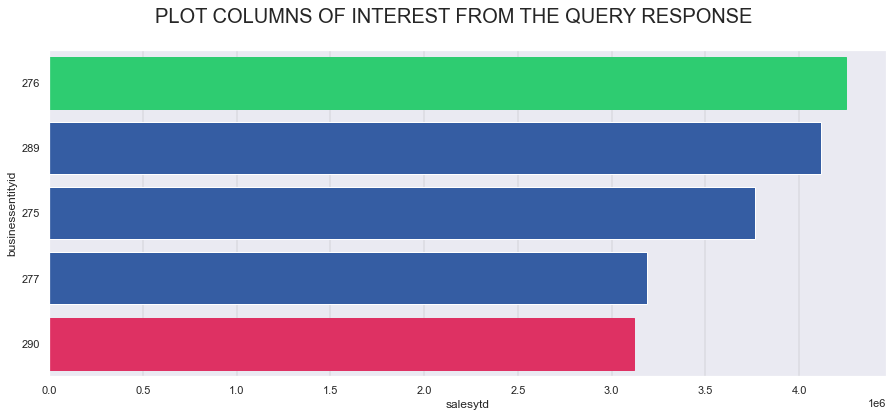

In [248]:
query = """
SELECT businessentityid
	  ,salesytd
FROM salesperson
ORDER BY salesytd DESC
LIMIT 5
"""
plot_answer(pd.read_sql(query, sqbase),'businessentityid','salesytd','h',15,6,1)

#### 2.2. Find the top 5 salespeople who made the most sales in the year 2013

,salespersonid,totalsales
0,276,4.111295e+06
1,289,4.106064e+06
2,275,3.985375e+06
3,277,3.396776e+06
4,290,2.646078e+06


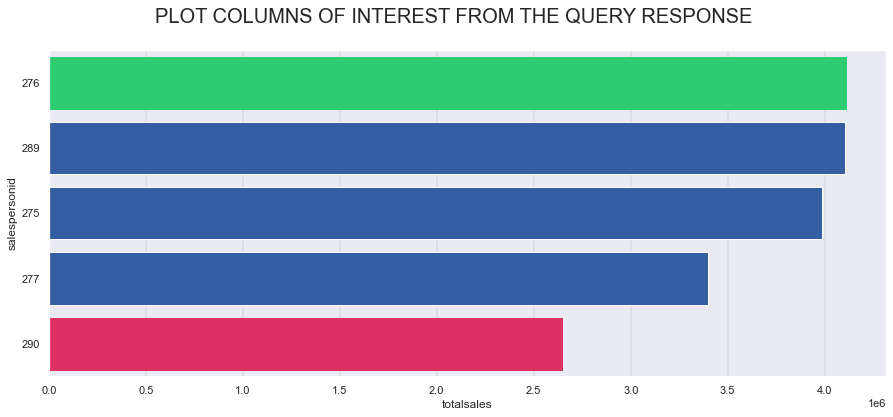

In [250]:
query = """
SELECT salespersonid
	,SUM(subtotal) AS totalsales
FROM salesorderheader
WHERE subtotal IS NOT NULL --filter null values in subtotal
	AND salespersonid <> ""--filter null empty salespersonid  
	AND orderdate LIKE "2013%" --select only the orderdate from 2013
GROUP BY salespersonid
ORDER BY totalsales DESC
LIMIT 5
"""

plot_answer(pd.read_sql(query, sqbase),'salespersonid','totalsales','h',15,6,1)

#### 2.3. Shows for each sales person id the total amount of money paid. Display the 5 first rows

,salesorderid,ordertotal
0,43659,20565.6206
1,43660,1294.2529
2,43661,32726.4786
3,43662,28832.5289
4,43663,419.4589


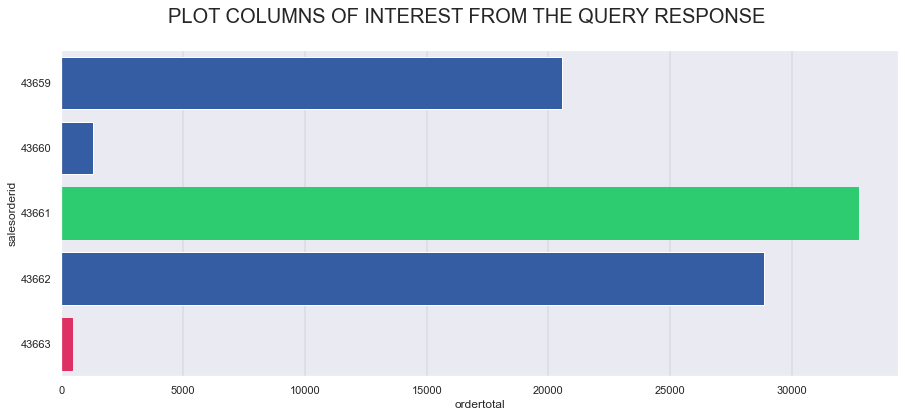

In [252]:
query="""
SELECT salesorderdetail.salesorderid AS salesorderid 
	,SUM(orderqty*unitprice*(1-unitpricediscount)) AS ordertotal
FROM salesorderdetail
GROUP BY salesorderid
ORDER BY salesorderid  ASC
LIMIT 5
"""

plot_answer(pd.read_sql(query, sqbase),'salesorderid','ordertotal','h',15,6,1)

#### 2.4. Find the sales for each salesperson for the year 2013 and display results for the top 5 salespeople.

,salespersonid,ordertotalsum
0,276,4.111295e+06
1,289,4.106064e+06
2,275,3.985375e+06
3,277,3.396776e+06
4,290,2.646078e+06


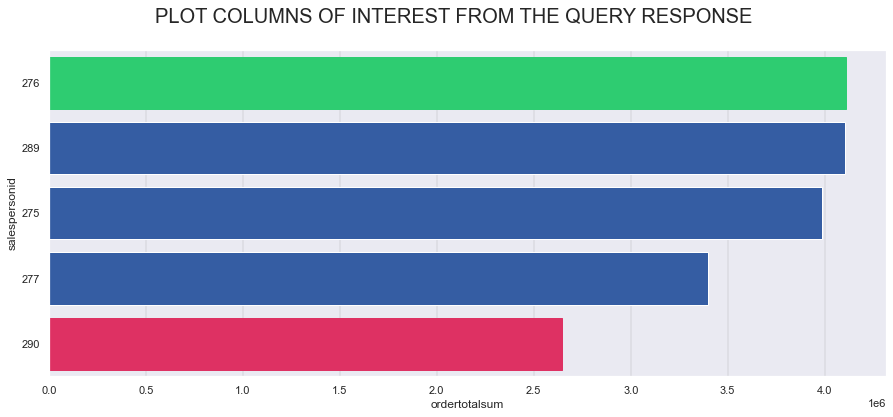

In [254]:
query = """
WITH order_ordertotal AS
(
	SELECT salesorderdetail.salesorderid AS salesorderid 
		,SUM(orderqty*unitprice*(1-unitpricediscount)) AS ordertotal
	FROM salesorderdetail
	GROUP BY salesorderid
	ORDER BY salesorderid  ASC
)
SELECT salesorderheader.salespersonid
	,SUM(order_ordertotal.ordertotal) AS ordertotalsum
FROM order_ordertotal
INNER JOIN salesorderheader ON order_ordertotal.salesorderid  = salesorderheader.salesorderid
WHERE order_ordertotal.ordertotal IS NOT NULL --filter null values in subtotal variable
	AND salesorderheader.salespersonid <> ""--filter null empty salespersonid variable
	AND salesorderheader.orderdate LIKE "2013%" --select only the orderdate values for year 2013
GROUP BY salesorderheader.salespersonid
ORDER BY ordertotalsum DESC
LIMIT 5
"""

plot_answer(pd.read_sql(query, sqbase),'salespersonid','ordertotalsum','h',15,6,1)

#### 2.5. Join the previous query with the sales person table, display the 5 first rows

,salespersonid,ordertotalsum,commissionpct
0,274,4.310887e+05,0.000
1,275,3.985375e+06,0.012
2,276,4.111295e+06,0.015
3,277,3.396776e+06,0.015
4,278,1.389837e+06,0.010


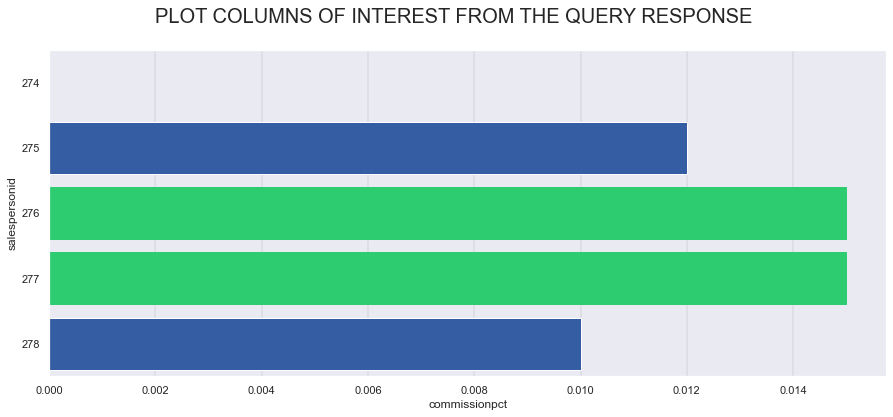

In [256]:
query = """
WITH first_query AS 
	(WITH order_ordertotal AS
	(
		SELECT salesorderdetail.salesorderid AS salesorderid 
			,SUM(orderqty*unitprice*(1-unitpricediscount)) AS ordertotal
		FROM salesorderdetail
		GROUP BY salesorderid
		ORDER BY salesorderid  ASC
	)
	SELECT salesorderheader.salespersonid
		,SUM(order_ordertotal.ordertotal) AS ordertotalsum
	FROM order_ordertotal
	INNER JOIN salesorderheader ON order_ordertotal.salesorderid  = salesorderheader.salesorderid
	WHERE order_ordertotal.ordertotal IS NOT NULL --filter null values in subtotal
		AND salesorderheader.salespersonid <> ""--filter null empty salespersonid
		AND salesorderheader.orderdate LIKE "2013%" --select only the orderdate from 2013
	GROUP BY salesorderheader.salespersonid
	)
SELECT first_query.salespersonid
	,first_query.ordertotalsum
	,salesperson.commissionpct
FROM first_query
INNER JOIN salesperson ON first_query.salespersonid = salesperson.businessentityid
LIMIT 5
"""

plot_answer(pd.read_sql(query, sqbase),'salespersonid','commissionpct','h',15,6,1)

#### 2.6. Using the Country region currency, salesperson, and salesterritory tables. Find relevant currency symbol for each of the top salespeople.Print the 5 first rows

In [257]:
query = """
SELECT salesperson.businessentityid
	,countryregioncurrency.currencycode
FROM countryregioncurrency
INNER JOIN salesterritory ON  countryregioncurrency.countryregioncode = salesterritory.countryregioncode
INNER JOIN salesperson ON salesterritory.territoryid = salesperson.territoryid
ORDER BY salesperson.businessentityid
LIMIT 5
"""
pd.read_sql(query, con=sqbase)

,businessentityid,currencycode
0,275,USD
1,276,USD
2,277,USD
3,278,CAD
4,279,USD


#### 2.7 Join the queries 2.5 and 2.6 and print the table result. Order the results by currency (ascending) and total sales (descending) to make it easier to see who the best sales people. Print the 6 first rows

,salespersonid,currencycode,commissionpct,ordertotalsum
0,286,AUD,0.018,5.857558e+05
1,282,CAD,0.015,1.044811e+06
2,278,CAD,0.010,4.359490e+05
3,288,DEM,0.018,5.816079e+05
4,290,EUR,0.016,8.675186e+05
5,288,EUR,0.018,5.816079e+05


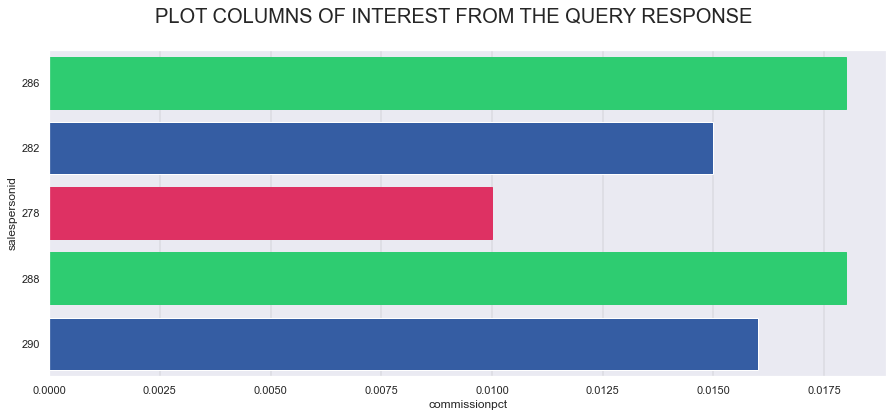

In [258]:
query = """
WITH third_query AS
	(WITH second_query AS 
		(WITH first_query AS
		(
			SELECT salesorderdetail.salesorderid AS salesorderid 
				,SUM(orderqty*unitprice*(1-unitpricediscount)) AS ordertotal
			FROM salesorderdetail
			GROUP BY salesorderid
			ORDER BY salesorderid  ASC
		)
		SELECT salesorderheader.salespersonid
			,SUM(first_query.ordertotal) AS ordertotalsum
		FROM first_query
		INNER JOIN salesorderheader ON first_query.salesorderid  = salesorderheader.salesorderid
		WHERE first_query.ordertotal IS NOT NULL --filter null values in subtotal
			AND salesorderheader.salespersonid <> ""--filter null empty salespersonid
			AND salesorderheader.orderdate LIKE "2014%" --select only the orderdate from 2014
		GROUP BY salesorderheader.salespersonid
		)
	SELECT second_query.salespersonid
		,second_query.ordertotalsum
		,salesperson.commissionpct
	FROM second_query
	INNER JOIN salesperson ON second_query.salespersonid = salesperson.businessentityid
),
fourth_query AS
(
	SELECT salesperson.businessentityid
		,countryregioncurrency.currencycode
	FROM countryregioncurrency
	INNER JOIN salesterritory ON  countryregioncurrency.countryregioncode = salesterritory.countryregioncode
	INNER JOIN salesperson ON salesterritory.territoryid = salesperson.territoryid
	ORDER BY salesperson.businessentityid 
)
SELECT salespersonid
	  ,currencycode
	  ,commissionpct
	  ,ordertotalsum
FROM third_query
INNER JOIN fourth_query ON  third_query.salespersonid = fourth_query.businessentityid
ORDER BY fourth_query.currencycode ASC, third_query.ordertotalsum DESC
LIMIT 6
"""
plot_answer(pd.read_sql(query, sqbase),'salespersonid','commissionpct','h',15,6,1)


,salespersonid,currencycode,commissionpct,ordertotalsum
0,286,AUD,0.018,5.857558e+05
1,282,CAD,0.015,1.044811e+06
2,278,CAD,0.010,4.359490e+05
3,288,DEM,0.018,5.816079e+05
4,290,EUR,0.016,8.675186e+05
5,288,EUR,0.018,5.816079e+05


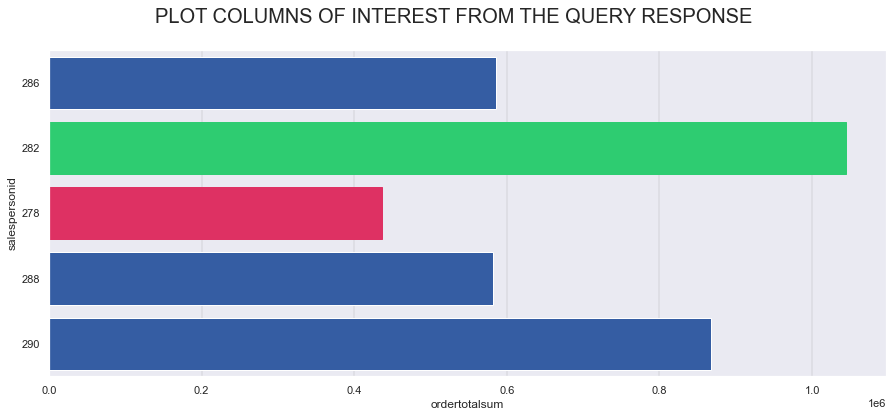

In [260]:
plot_answer(pd.read_sql(query, sqbase),'salespersonid','ordertotalsum','h',15,6,1)